# Lesson 1 Exercise Solutions

## Exercise 1: Spacecraft Thruster Telemetry Visualization

#### Objectives:
- Read in the `spacecraft_thruster.csv` file using `csv` and `csv.reader`
- Make an array titled `thrust_values` that contains only the thrust values of each row   
- Plot the data of `thrust_values` on a line chart using `matplotlib`

#### Hint:
- The column number for `time` is 0
- The column number for `thrust` is 2
- You can parse the str time values as date objects using the following code:
```
date_obj = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f')
```

In [7]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

In [8]:
thrust_values = []
time_values = []

with open('../spacecraft_thruster.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row if present
    for row in reader:
        thrust_values.append(float(row[2]))
        date_obj = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f')
        time_values.append(date_obj)

print(thrust_values[:5])

[0.0004118427323051, -0.0045939924806919, 0.0071398881769683, -0.0018301570125413, 0.0048886574385789]


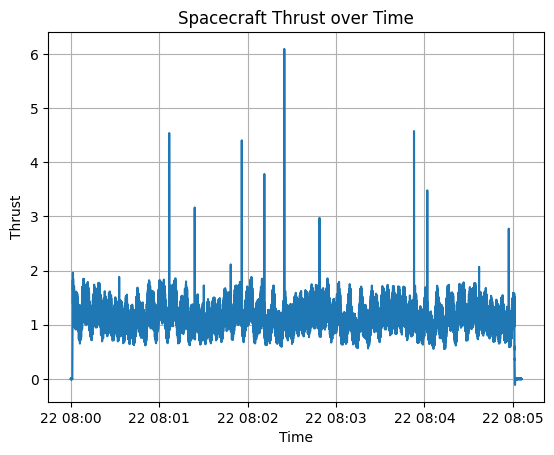

In [9]:
plt.plot(time_values, thrust_values)
plt.xlabel('Time')
plt.ylabel('Thrust')
plt.title('Spacecraft Thrust over Time')
plt.grid(True)
plt.show()

## Exercise 2: Modeling Black Body Radiation

#### Objectives:
- Import `numpy`, `BlackBody` from `astropy.modeling.models`, units from `astropy`, and quantity_support from `astropy.visualization`
- Create a BlackBody model with 3000K as the temperature and store it within the `black_body` variable
- Create a numpy range from 2000 to 200000 mm and store it within the `wavelengths` variable
- Obtain the flux by running `black_body(wavelengths)` and store it within `flux`
- Run the code below to test your model!

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

In [27]:
black_body = BlackBody(temperature=3000*u.K)
wavelengths = np.arange(2000, 200000) * u.AA
flux = black_body(wavelengths)

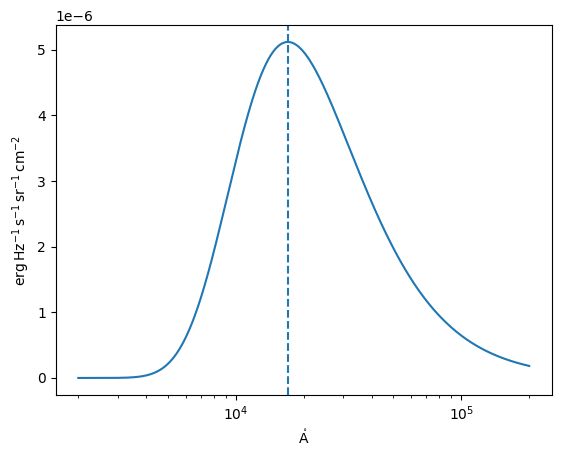

In [28]:
with quantity_support():
    plt.figure()
    plt.semilogx(wav, flux)
    plt.axvline(bb.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    plt.show()